# MSBA 410 Customer Analytics: Segmentation Exercise

Guangying Pan 006309837

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data =pd.read_excel('mugs-data-for-segmentation-exercise.xlsx')
data = data.rename(columns=lambda x: x.replace(' ', ''))
data.head()

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,...,ICl,Icn,IBr,income,age,sports,gradschl,P1,P2,P3
0,1,1,3,7,1,3,7,1,7,6,...,7,34,14,63,46,0,0,0.698892,0.083471,0.217637
1,2,1,6,7,1,4,7,1,7,6,...,10,51,15,65,48,0,0,0.486721,0.373831,0.139448
2,3,1,6,7,1,4,7,7,4,1,...,8,16,9,38,37,0,0,0.044146,0.862398,0.093456
3,4,1,6,7,1,4,7,7,1,3,...,40,20,16,77,58,1,1,0.581424,0.045778,0.372798
4,5,1,4,7,1,4,7,1,7,2,...,9,0,11,44,41,0,0,0.155494,0.558013,0.286493


## Part (A) Product affinity based segmentation:

**1. Compute and report the characteristics of the affinity based segment for Product 3 (our candidate as given above). Report the characteristics in terms of the following descriptors: pPr30, pPr10, pPr05, pIn0.5, pIn1, pIn3, pCp12, pCp20, pCp32, pClD, pClF, pClE, pCnSl, pCnSp, pCnLk, pBrA, pBrB, pBrC, IPr, Iin, ICp, ICl, Icn, IBr, and the demographics income, age, sports and gradschl. For this you need to compute the weighted average of columns 2 through 29 weighted by the purchase probability of buying our product as given in column 32. You are  to load the data into python or R and compute the weighted averages in R or python; this is to help you build familiarity with these languages and prepare you better for your job.**

In [3]:
# weighted avg of descriptor x with weight w

weighted_averages = {}

for i in range(1, 29):
    column_name = data.columns[i]
    weighted_averages[column_name] = (data.iloc[:, i] * data.iloc[:, 31]).sum()/(data.iloc[:, 31].sum())
    
df_weighted_averages = pd.DataFrame(list(weighted_averages.items()), columns=['Column', 'Weighted Average'])
df_weighted_averages

,Column,Weighted Average
0,pPr30,1.000000
1,pPr10,5.015490
2,pPr05,7.000000
3,pIn0.5,1.000000
4,pIn1,3.914327
5,pIn3,7.000000
6,pCp12,3.096495
7,pCp20,5.327830
8,pCp32,3.879569
9,pClD,1.000000


**2. Repeat the step above for the product of brand A and the product for brand B, this time using the purcahse probabilities of buying those products as given in columns 30 and 31.  Compute also the overall mean for each descriptor (this done by a simple average of each descriptor across all 311 customers). Compute the log-lifts for all variables for the affinity based segment for each product and focus on the large positive and negative numbers to figure out how each segment is different from the other segments and the overall population average (A common thumb rule is to take base 10 absolute log lifts greater than 0.04  to be noteworthy and greater than 0.08 to be very noteworthy). You will use these in the next step to come up with a verbal description that characterizes each segment.)**

In [4]:
# overall mean and weighted avg for each descriptor

descriptor = {}

for i in range(1, 29):
    column = data.columns[i]
    
    descriptor[column] = [
        data.iloc[:, i].mean(),
        (data.iloc[:, i] * data.iloc[:, 29]).sum() / data.iloc[:, 29].sum(),
        (data.iloc[:, i] * data.iloc[:, 30]).sum() / data.iloc[:, 30].sum(),
        (data.iloc[:, i] * data.iloc[:, 31]).sum() / data.iloc[:, 31].sum()
    ]

df_descriptor = pd.DataFrame.from_dict(descriptor, orient='index', columns=['Overall Mean', 'Weighted Average 1', 
                                                                         'Weighted Average 2', 'Weighted Average 3'])

df_descriptor.reset_index(inplace=True)
df_descriptor.rename(columns={'index': 'Column'}, inplace=True)
df_descriptor

,Column,Overall Mean,Weighted Average 1,Weighted Average 2,Weighted Average 3
0,pPr30,1.000000,1.000000,1.000000,1.000000
1,pPr10,5.266881,4.919876,5.666979,5.015490
2,pPr05,7.000000,7.000000,7.000000,7.000000
3,pIn0.5,1.000000,1.000000,1.000000,1.000000
4,pIn1,4.041801,4.020961,4.133281,3.914327
5,pIn3,7.000000,7.000000,7.000000,7.000000
6,pCp12,3.154341,3.266504,3.108512,3.096495
7,pCp20,5.344051,5.366698,5.337524,5.327830
8,pCp32,3.890675,3.789076,3.970306,3.879569
9,pClD,1.000000,1.000000,1.000000,1.000000


In [5]:
# log-lifts

df_descriptor['Seg_1_Log_Lift'] = np.log10(df_descriptor['Weighted Average 1']/df_descriptor['Overall Mean']).round(5)
df_descriptor['Seg_2_Log_Lift'] = np.log10(df_descriptor['Weighted Average 2']/df_descriptor['Overall Mean']).round(5)
df_descriptor['Seg_3_Log_Lift'] = np.log10(df_descriptor['Weighted Average 3']/df_descriptor['Overall Mean']).round(5)

df_descriptor_lift = df_descriptor[['Column', 'Seg_1_Log_Lift', 'Seg_2_Log_Lift', 'Seg_3_Log_Lift']]
df_descriptor_lift

,Column,Seg_1_Log_Lift,Seg_2_Log_Lift,Seg_3_Log_Lift
0,pPr30,0.00000,0.00000,0.00000
1,pPr10,-0.02960,0.03180,-0.02124
2,pPr05,0.00000,0.00000,0.00000
3,pIn0.5,0.00000,0.00000,0.00000
4,pIn1,-0.00225,0.00972,-0.01392
5,pIn3,0.00000,0.00000,0.00000
6,pCp12,0.01517,-0.00636,-0.00804
7,pCp20,0.00184,-0.00053,-0.00132
8,pCp32,-0.01149,0.00880,-0.00124
9,pClD,0.00000,0.00000,0.00000


In [6]:
conditions = [
    (df_descriptor['Seg_1_Log_Lift'].abs() > 0.08),
    (df_descriptor['Seg_1_Log_Lift'].abs() > 0.04),
    (df_descriptor['Seg_2_Log_Lift'].abs() > 0.08),
    (df_descriptor['Seg_2_Log_Lift'].abs() > 0.04),
    (df_descriptor['Seg_3_Log_Lift'].abs() > 0.08),
    (df_descriptor['Seg_3_Log_Lift'].abs() > 0.04)]

choices = [
    'Very Noteworthy', 'Noteworthy', 
    'Very Noteworthy', 'Noteworthy', 
    'Very Noteworthy', 'Noteworthy']

df_descriptor['Seg_1_Note'] = np.select(conditions[:2], choices[:2], default='Normal')
df_descriptor['Seg_2_Note'] = np.select(conditions[2:4], choices[2:4], default='Normal')
df_descriptor['Seg_3_Note'] = np.select(conditions[4:], choices[4:], default='Normal')

df_descriptor_lift = df_descriptor[['Column', 'Seg_1_Log_Lift', 'Seg_1_Note', 'Seg_2_Log_Lift', 'Seg_2_Note', 
                                    'Seg_3_Log_Lift', 'Seg_3_Note']]
df_descriptor_lift

,Column,Seg_1_Log_Lift,Seg_1_Note,Seg_2_Log_Lift,Seg_2_Note,Seg_3_Log_Lift,Seg_3_Note
0,pPr30,0.00000,Normal,0.00000,Normal,0.00000,Normal
1,pPr10,-0.02960,Normal,0.03180,Normal,-0.02124,Normal
2,pPr05,0.00000,Normal,0.00000,Normal,0.00000,Normal
3,pIn0.5,0.00000,Normal,0.00000,Normal,0.00000,Normal
4,pIn1,-0.00225,Normal,0.00972,Normal,-0.01392,Normal
5,pIn3,0.00000,Normal,0.00000,Normal,0.00000,Normal
6,pCp12,0.01517,Normal,-0.00636,Normal,-0.00804,Normal
7,pCp20,0.00184,Normal,-0.00053,Normal,-0.00132,Normal
8,pCp32,-0.01149,Normal,0.00880,Normal,-0.00124,Normal
9,pClD,0.00000,Normal,0.00000,Normal,0.00000,Normal


* For Segment 1, customers have brand preferences that show a strong affinity for Brand A over Brand B & C. Moreover, customers in Segment 1 are price insensitive but value features such as time insulation, capacity, and containment. They are also highly interested in sports.

* For Segment 2, customers exhibit a certain level of affinity for Brands B and C over Brand A, with a slight preference for Brand B over Brand C. Additionally, customers in Segment 2 are price sensitive and place the least value on features such as time insulation and containment, and less value on capacity and cleanability. Considering demographic variables, these customers generally have lower earnings, are less educated, and are less active in sports compared to the overall market average.

* For Segment 3, customers show a strong affinity for Brand C over Brands A and B. Furthermore, customers in Segment 3 are price insensitive, yet more price sensitive than those in Segment 1. They highly value the feature of cleanability but place the least value on capacity. In terms of demographic variables, customers in Segment 3 are the most educated and most active in sports.

**3. Use your findings from Step 2 above to come up with a verbal description and a persona story that characterizes each segment. The persona  story gives a mental image to the marketing manager, not only in terms of the descriptors in the dataset, but also in terms of plausible hypothesized characteristics that go beyond the descriptors available. The suggested length for the persona description for each segment is 2-5 sentences. If you do use generative AI tools for this part of the HW (and indeed this is the part in this HW where such tools may help the most) then please be sure to document your work and submit for extra credit via Optional Task 3.**

Segment 1 Persona: The Sports Enthusiast Professional

Meet Alex, a dedicated triathlete who works as a corporate lawyer in a bustling city. Alex prefers the high-quality products of Brand A, which perfectly suit his active lifestyle. He is not particularly worried about the price; instead, he looks for gear that offers superior time insulation to keep his hydration at the right temperature during long training sessions and competitions. For Alex, capacity and containment are crucial as he juggles his sports equipment and professional gear. His life is a balance of adrenaline-pumping activity and high-stakes legal challenges.

Segment 2 Persona: The Budget-Conscious Family Shopper

Jenny is a part-time customer service representative and a full-time mom living in a suburban area. She gravitates towards Brands B and C, with a slight preference for Brand B due to its affordability and decent quality. With a tight budget, Jenny is always hunting for the best deals, making price a significant factor in her purchasing decisions. She is less concerned about high-tech features like time insulation but appreciates a product that is somewhat easy to clean. Although not very active in sports, Jenny's priority is managing her household efficiently while sticking to her budget.

Segment 3 Persona: The Eco-Conscious Educator

Sam is an environmentally aware college professor who loves to spend his weekends kayaking or cycling. He is a fan of Brand C, attracted by their commitment to sustainability and the easy cleanability of their products. While Sam is somewhat sensitive to prices, he is willing to pay a premium for products that meet his ethical and practical standards. He doesn't need large capacities but values a compact and efficient design that fits his minimalist lifestyle. Educated and active, Sam is often found discussing environmental issues with his students or exploring new outdoor activities.

## Part (B) Classical segmentation:

In [7]:
from sklearn.cluster import KMeans

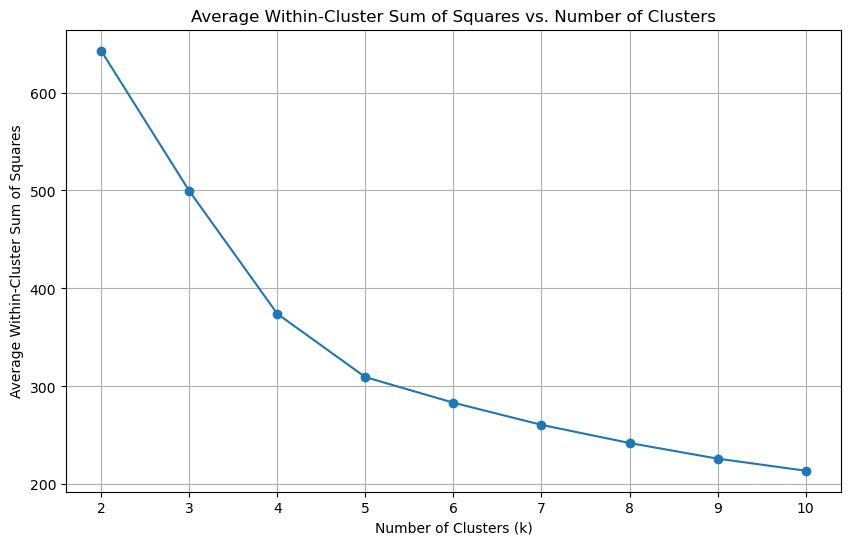

In [8]:
X = data.iloc[:, 1:25]

ks = range(2, 11)
inertia = []

for k in ks:
    np.random.seed(410014)
    kmeansModel = KMeans(n_clusters=k, n_init=50, max_iter=100)
    kmeansModel.fit(X)
    ave_within_cluster_mean_sum_of_squares = (kmeansModel.inertia_) / X.shape[0]
    inertia.append(ave_within_cluster_mean_sum_of_squares)


plt.figure(figsize=(10, 6))
plt.plot(ks, inertia, marker='o')
plt.title('Average Within-Cluster Sum of Squares vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()

According to the elbow method from a quantitative standpoint, when k = 4, the decrease in average within-cluster sum of squares starts to decrease, indicating that the additional cluster are not contributing significantly to a better explanation of the variance. 

**1. Compute and report the characteristics of all segments. Report the characteristics in terms of the average value, for each segment, of each of the following variables: pPr30, pPr10, pPr05, pIn0.5, pIn1, pIn3, pCp12, pCp20, pCp32, pClD, pClF, pClE, pCnSl, pCnSp, pCnLk, pBrA, pBrB, pBrC,IPr, Iin, ICp, ICl, ICn, IBr. Also, do profiling in terms of the demographics: income, age, sports and gradschl. "Profiling" means reporting the average value, for each segment, of each  descriptor that was excluded from the kmeans analysis's inputs. In this case, the excluded variables are:income, age, sports and gradschl. Finally, report the percentage of customers in each segment.**

In [9]:
np.random.seed(410014)
kmeansModel = KMeans(n_clusters=4, n_init=50, max_iter=100)
kmeansModel.fit(X)
data['Cluster'] = kmeansModel.labels_
X['Cluster'] = kmeansModel.labels_

In [10]:
# Cluster Analysis Output
Cluster_Analysis = X.groupby('Cluster').mean()
Cluster_Analysis

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,...,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.186441,7.0,1.0,3.745763,7.0,3.254237,5.610169,3.457627,1.0,...,7.0,3.677966,4.288136,3.898305,16.508475,10.813559,8.237288,39.186441,12.271186,12.966102
1,1.0,5.558621,7.0,1.0,4.068966,7.0,2.882759,5.055172,4.268966,1.0,...,7.0,2.579310,4.220690,5.131034,46.068966,8.475862,8.744828,12.689655,11.137931,12.875862
2,1.0,5.134615,7.0,1.0,4.057692,7.0,2.788462,5.423077,4.115385,1.0,...,7.0,6.057692,3.461538,2.596154,13.442308,12.211538,9.461538,12.115385,39.596154,13.250000
3,1.0,4.709091,7.0,1.0,4.272727,7.0,4.109091,5.745455,3.145455,1.0,...,7.0,5.800000,3.654545,2.436364,12.818182,16.072727,35.345455,11.872727,10.836364,13.018182


In [11]:
# Profiling Output
profile_variables = data[['income', 'age', 'sports', 'gradschl', 'Cluster']]
Profiling_Analysis = profile_variables.groupby('Cluster').mean()
Profiling_Analysis

,income,age,sports,gradschl
Cluster,,,,
0,63.067797,50.203390,0.711864,0.644068
1,47.372414,42.179310,0.110345,0.282759
2,61.634615,46.423077,0.423077,0.288462
3,60.163636,45.418182,0.436364,0.181818


In [12]:
# Percentage of Customer in Each Segment
segment_counts = data.groupby('Cluster')['Cluster'].count()
total_counts = data.shape[0]

percentage = (segment_counts / total_counts) * 100
df_percentage = pd.DataFrame({'Percentage': percentage}).rename_axis('Segment').reset_index()
df_percentage

,Segment,Percentage
0,0,18.971061
1,1,46.623794
2,2,16.720257
3,3,17.684887


**2. Compute the log-lifts for all variables for all segments and focus on the large positive and negative numbers  to figure out how each segment is different from the other segments and the overall population average. You will use these in the next step to come up with a verbal description that characterizes each segment.  The log lift for any variable "x" for any segment "s" is  Log( (unweighted average of "x" across all persons within segment "s")/(unweighted average of x across all persons regardless of segment)).**

In [13]:
df_all_variables = pd.concat([Cluster_Analysis, Profiling_Analysis], axis=1)
df_all_variables

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,...,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.186441,7.0,1.0,3.745763,7.0,3.254237,5.610169,3.457627,1.0,...,16.508475,10.813559,8.237288,39.186441,12.271186,12.966102,63.067797,50.203390,0.711864,0.644068
1,1.0,5.558621,7.0,1.0,4.068966,7.0,2.882759,5.055172,4.268966,1.0,...,46.068966,8.475862,8.744828,12.689655,11.137931,12.875862,47.372414,42.179310,0.110345,0.282759
2,1.0,5.134615,7.0,1.0,4.057692,7.0,2.788462,5.423077,4.115385,1.0,...,13.442308,12.211538,9.461538,12.115385,39.596154,13.250000,61.634615,46.423077,0.423077,0.288462
3,1.0,4.709091,7.0,1.0,4.272727,7.0,4.109091,5.745455,3.145455,1.0,...,12.818182,16.072727,35.345455,11.872727,10.836364,13.018182,60.163636,45.418182,0.436364,0.181818


In [14]:
pd.set_option('display.max_columns', None)

In [15]:
overall_mean = df_descriptor.set_index('Column')['Overall Mean']

for col in df_all_variables.columns:
    df_all_variables[col] = np.log10(df_all_variables[col] / overall_mean[col]).round(5)

df_all_variables

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,-0.00668,0.0,0.0,-0.03303,0.0,0.01354,0.02111,-0.05125,0.0,0.02799,0.0,0.0,-0.02522,0.0,-0.02977,0.02951,-0.01083,-0.24656,-0.00296,-0.21367,0.35070,-0.11680,-0.00049,0.05947,0.04768,0.32812,0.28466
1,0.0,0.02341,0.0,0.0,0.00291,0.0,-0.03910,-0.02413,0.04030,0.0,-0.00771,0.0,0.0,-0.00381,0.0,-0.18387,0.02263,0.10849,0.19914,-0.10874,-0.18770,-0.13899,-0.15888,-0.00352,-0.06481,-0.02796,-0.48152,-0.07286
2,0.0,-0.01105,0.0,0.0,0.00170,0.0,-0.05354,0.00638,0.02439,0.0,-0.02790,0.0,0.0,0.05082,0.0,0.18693,-0.06349,-0.18738,-0.33580,0.04984,-0.15349,-0.15910,0.39196,0.00892,0.04949,0.01368,0.10215,-0.06419
3,0.0,-0.04862,0.0,0.0,0.02413,0.0,0.11484,0.03145,-0.09234,0.0,0.01443,0.0,0.0,-0.01493,0.0,0.16805,-0.03992,-0.21497,-0.35645,0.16916,0.41888,-0.16789,-0.17080,0.00125,0.03900,0.00417,0.11558,-0.26464


In [16]:
def categorize_value(value):
    abs_value = abs(value)
    if abs_value > 0.08:
        return 'Very Noteworthy'
    elif abs_value > 0.04:
        return 'Noteworthy'
    else:
        return 'Normal'

noteworthy_df = df_all_variables.applymap(categorize_value)
noteworthy_df.T

Cluster,0,1,2,3
pPr30,Normal,Normal,Normal,Normal
pPr10,Normal,Normal,Normal,Noteworthy
pPr05,Normal,Normal,Normal,Normal
pIn0.5,Normal,Normal,Normal,Normal
pIn1,Normal,Normal,Normal,Normal
pIn3,Normal,Normal,Normal,Normal
pCp12,Normal,Normal,Noteworthy,Very Noteworthy
pCp20,Normal,Normal,Normal,Normal
pCp32,Noteworthy,Noteworthy,Normal,Very Noteworthy
pClD,Normal,Normal,Normal,Normal


**3. Use your findings from Step 2 above to come up with a verbal description and a persona story that characterizes each segment. The persona  story gives a mental image to the marketing manager  not only in terms of the descriptors in the dataset, but also in terms of plausible hypothesized characteristics that go beyond the descriptors available.  Here too, if you do use generative AI tools, then please be sure to document your work and submit for extra credit via Optional Task 3.**

* For Segment 1 (Cluster 0), customers pay special attention to the 32 oz capacity over other preferences. Moreover, customFor Segment 4 (Cluster 3), customers pay special attention to a price of $10 (favor) while disliking both the 12 oz and 32 oz capacities. Moreover, customers in this segment have a brand preference, favoring Brand A over Brand C. These customers are price sensitive and care least about time insulation, capacity, cleanability, and containment. Considering demographic variables, customers in this segment tend to be less active in sports and less educated.ers in this segment are price insensitive and care least about capacity and containment features but prioritize cleanability the most. Considering demographic variables, customers in this segment tend to earn more, are slightly older, better educated, and more actively engaged in sports compared to the overall population.

* For Segment 2 (Cluster 1), customers also pay special attention to the 32 oz capacity over other preferences. Moreover, customers in this segment show strong brand preferences, particularly favoring Brand C over Brand A. Additionally, customers are even more price insensitive and care least about the cleanability and containment features, but prioritize time insulation and capacity. Considering the demographic variables, customers in this segment tend to be very active in sports, earn slightly more, and are achieving higher degrees.

* For Segment 3 (Cluster 2), customers pay special attention to the 12 oz capacity and spill-resistant containment over other preferences. Moreover, customers in this segment show strong brand preferences, particularly favoring Brand A over Brand C. Additionally, customers are price insensitive and care least about capacity and cleanability, but they prioritize containment and pay little attention to time insulation. Considering demographic variables, customers in this segment tend to be active in sports, earn slightly more, but are less educated.

* For Segment 4 (Cluster 3), customers pay special attention to a price of $10 (favor) while disliking both the 12 oz and 32 oz capacities. Moreover, customers in this segment have a brand preference, favoring Brand A over Brand C. These customers are price sensitive and care least about time insulation, capacity, cleanability, and containment. Considering demographic variables, customers in this segment tend to be less active in sports and less educated.

**Persona:**

Segment 1 (Cluster 0):
Emma is a seasoned marketing executive in her mid-40s who enjoys weekend golfing. She values products that simplify her life and demonstrate her sophisticated taste. Emma prefers products like the 32 oz bottles because they allow her to stay hydrated throughout her busy day without frequent refills. She isn’t concerned about the price, focusing instead on the quality and ease of cleaning her purchases. Emma represents customers who are well-educated, earn a higher income, and participate actively in sports.

Segment 2 (Cluster 1):
Jack is an avid mountain biker and outdoor enthusiast in his early 30s. He looks for gear that can keep up with his high-energy lifestyle, like 32 oz water bottles that ensure he stays hydrated and items that keep his drinks cold for extended periods. Jack doesn't mind spending more for premium brands, specifically Brand C, as he believes they offer superior performance and durability. He represents customers who are very active in sports, financially comfortable, and highly educated.

Segment 3 (Cluster 2):
Sara is a yoga instructor and part-time nutritionist who prefers compact, easy-to-carry products that align with her minimalist lifestyle, such as 12 oz spill-resistant bottles. She favors Brand A for its reliability and design. Price is not a barrier for Sara; she's more interested in specific features like spill resistance that cater to her need for convenience during her active daily routine. She is typical of customers who are fairly active, slightly better off financially, though somewhat less formally educated.

Segment 4 (Cluster 3):
Tom is a budget-conscious retail worker in his late 20s, who isn't much into sports but enjoys a good walk in the park now and then. He always looks for the best deals, such as $10 water bottles, steering clear of pricier or larger models that don't suit his needs. Brand A is his go-to because it offers the best value for money. Tom exemplifies customers who are price sensitive, less active in sports, and have lower educational levels. 

## Optional Task 3 on using generative AI tools to produce code or persona descriptions: 

**This question applies only if you used generative AI in doing any of Part (A), Part (B), Optional Task 1 or Optional Task 2, in which case this question offers a way for you to document your generative-AI-interaction strategies and get extra credit.  If you did not use generative AI in doing any of thse questions then please ignore this optional task. For as many of the questions Part (A), Part (B), Optional Task 1 and Optional Task 2 above,  for which you attempted and used a generative AI tool to produce code or text responses, please submit the following: (A) The prompt or sequence of prompts that you entered into the generative tool, (B) an identification of which sequence of prompts was entered into which  generative tool (like ChatGPT, Bing Chat, Bard, GitHub Copilot), (C) generative tool's  output from each prompt, identifying which output corresponds to which prompt and which generative tool.**

**Part (A) Q3**

**(A) The prompt or sequence of prompts that you entered into the generative tool:**

Given these three descriptions of three Segments, give a persona story that characterizes each segment (2-5 sentences): 

For Segment 1, customers have brand preferences that show a strong affinity for Brand A over Brand B & C. Moreover, customers in Segment 1 are price insensitive but value features such as time insulation, capacity, and containment. They are also highly interested in sports. 

For Segment 2, customers exhibit a certain level of affinity for Brands B and C over Brand A, with a slight preference for Brand B over Brand C. Additionally, customers in Segment 2 are price sensitive and place the least value on features such as time insulation and containment, and less value on capacity and cleanability. Considering demographic variables, these customers generally have lower earnings, are less educated, and are less active in sports compared to the overall market average. 

For Segment 3, customers show a strong affinity for Brand C over Brands A and B. Furthermore, customers in Segment 3 are price insensitive, yet more price sensitive than those in Segment 1. They highly value the feature of cleanability but place the least value on capacity. In terms of demographic variables, customers in Segment 3 are the most educated and most active in sports.

**(B) an identification of which sequence of prompts was entered into which  generative tool (like ChatGPT, Bing Chat, Bard, GitHub Copilot):**

ChatGPT

**(C) generative tool's  output from each prompt, identifying which output corresponds to which prompt and which generative tool.**

Segment 1 Persona: The Sports Enthusiast Professional

Segment 2 Persona: The Budget-Conscious Family Shopper

Segment 3 Persona: The Eco-Conscious Educator

**Part (b) Q3**

**(A) The prompt or sequence of prompts that you entered into the generative tool:**

Given these four descriptions of four Segments, give a persona story that characterizes each segment (2-5 sentences): 

For Segment 1 (Cluster 0), customers pay special attention to the 32 oz capacity over other preferences. Moreover, customFor Segment 4 (Cluster 3), customers pay special attention to a price of $10 (favor) while disliking both the 12 oz and 32 oz capacities. Moreover, customers in this segment have a brand preference, favoring Brand A over Brand C. These customers are price sensitive and care least about time insulation, capacity, cleanability, and containment. Considering demographic variables, customers in this segment tend to be less active in sports and less educated.ers in this segment are price insensitive and care least about capacity and containment features but prioritize cleanability the most. Considering demographic variables, customers in this segment tend to earn more, are slightly older, better educated, and more actively engaged in sports compared to the overall population.

For Segment 2 (Cluster 1), customers also pay special attention to the 32 oz capacity over other preferences. Moreover, customers in this segment show strong brand preferences, particularly favoring Brand C over Brand A. Additionally, customers are even more price insensitive and care least about the cleanability and containment features, but prioritize time insulation and capacity. Considering the demographic variables, customers in this segment tend to be very active in sports, earn slightly more, and are achieving higher degrees.

For Segment 3 (Cluster 2), customers pay special attention to the 12 oz capacity and spill-resistant containment over other preferences. Moreover, customers in this segment show strong brand preferences, particularly favoring Brand A over Brand C. Additionally, customers are price insensitive and care least about capacity and cleanability, but they prioritize containment and pay little attention to time insulation. Considering demographic variables, customers in this segment tend to be active in sports, earn slightly more, but are less educated.

For Segment 4 (Cluster 3), customers pay special attention to a price of $10 (favor) while disliking both the 12 oz and 32 oz capacities. Moreover, customers in this segment have a brand preference, favoring Brand A over Brand C. These customers are price sensitive and care least about time insulation, capacity, cleanability, and containment. Considering demographic variables, customers in this segment tend to be less active in sports and less educated.

**(B) an identification of which sequence of prompts was entered into which  generative tool (like ChatGPT, Bing Chat, Bard, GitHub Copilot):**

ChatGPT

**(C) generative tool's  output from each prompt, identifying which output corresponds to which prompt and which generative tool.**

Emma, Jack, Sara, Tom